In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [2]:
#Question 1:

#Autoencoder without hidden layer

encoding_dim = 64

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/5
235/235 [==============================] - 2s 7ms/step - loss: 0.6981 - val_loss: 0.6979
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6977 - val_loss: 0.6975
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6973 - val_loss: 0.6972
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6970 - val_loss: 0.6968
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


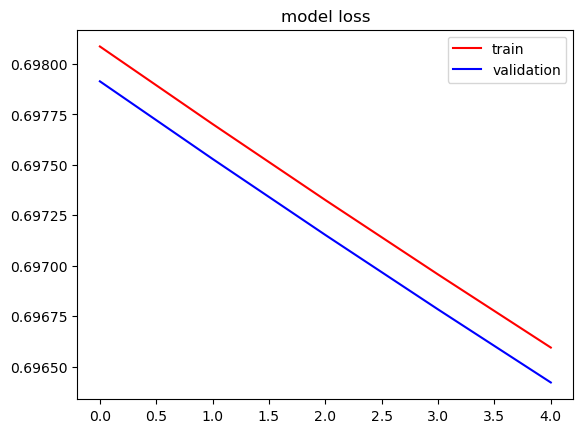

In [4]:
#Graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [5]:
#Autoencoder with hidden layer

ipt_size = 784
hdn_size = 128
code_size = 32

input_img = Input(shape=(ipt_size,))
hidden1 = Dense(hdn_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden1)
hidden2 = Dense(hdn_size, activation='relu')(code)
output_img = Dense(ipt_size, activation='sigmoid')(hidden2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 3s 7ms/step - loss: 0.2327 - val_loss: 0.1527
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.1367 - val_loss: 0.1235
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.1181 - val_loss: 0.1108
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.1093 - val_loss: 0.1050
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 0.1045 - val_loss: 0.1009


313/313 [==============================] - 0s 1ms/step


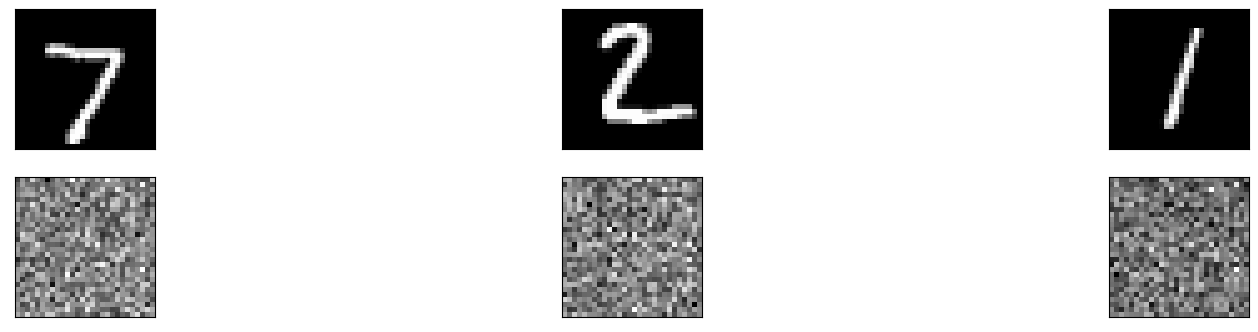

In [7]:
#Question 2: Do the prediction on the test data

encd_imgs = encoder.predict(x_test)
decd_imgs = decoder.predict(encd_imgs)

import matplotlib.pyplot as plt

a = 3
plt.figure(figsize=(20, 4))
for i in range(a):
    # displaying original
    a1 = plt.subplot(2, a, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    a1.get_xaxis().set_visible(False)
    a1.get_yaxis().set_visible(False)

    # display reconstruction
    a1 = plt.subplot(2, a, i + 1 + a)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    a1.get_xaxis().set_visible(False)
    a1.get_yaxis().set_visible(False)
plt.show()

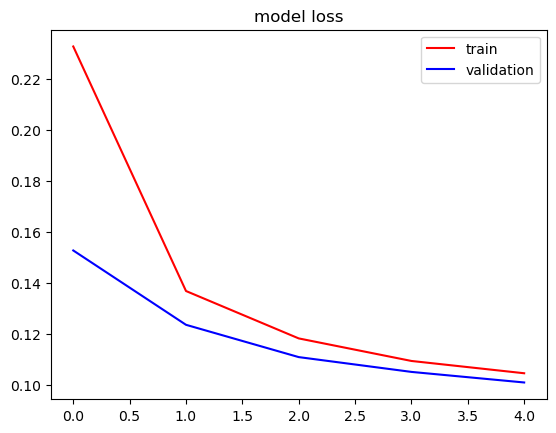

In [8]:
#Graph
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
#Questions 3 & 4:

from keras.layers import Input, Dense
from keras.models import Model, Sequential

# It Scales the train and test data between 0 and 1 range.
max_val = float(x_train.max())
x_train = x_train.astype('float32') / max_val
x_test = x_test.astype('float32') / max_val
x_train.shape, x_test.shape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)
input_dim = x_train.shape[1]
encoding_dim = 64

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))
num_img = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_img)

noise = np.random.normal(loc=0.1, scale=0.1, size=x_test.shape)
noised_images = x_test + noise
encoded_imgs = encoder.predict(noised_images)
decoded_imgs = autoencoder.predict(noised_images)

Compression factor: 12.25
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                       